# Dataloaders

In [2]:
# Importing libraries
import torchio as tio
import glob
import numpy as np
import random
import os

from torch.utils.data import DataLoader
import torch

If you use TorchIO for your research, please cite the following paper:
Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning. Link: https://arxiv.org/abs/2003.04696



In [3]:
# Create lists of datasets, shuffle it and extract list of IDs from it
datasets=[f for f in glob.glob('../0_Data/2_Masks_extracted/1_Full_size/*/*')]
random.shuffle(datasets)
participants=[os.path.basename(f) for f in datasets]

In [18]:
# Create dictionary with 12-fold split. Each key contains dictionary with IDs from train, validation and test sets
dict_test_train_valid={}
for i in range(10):
    dict_test_train_valid[i+1]={}
    
    tmp_participants=participants.copy()
    
    dict_test_train_valid[i+1]['test']=tmp_participants[6*i:(i+1)*6]
    
    tmp=list(set(tmp_participants)-set(tmp_participants[6*i:(i+1)*6]))
    
    dict_test_train_valid[i+1]['valid']=tmp[0:9]
    dict_test_train_valid[i+1]['train']=tmp[9:]

In [19]:
dict_test_train_valid

{1: {'test': ['CON_Nyst32',
   'ALB_Nyst31',
   'CON_Nyst47',
   'CON_Nyst18',
   'CON_Nyst14',
   'CON_Nyst19'],
  'valid': ['CON6',
   'CON7',
   'CON_Nyst29',
   'CON2',
   'CON_Nyst44',
   'ALB8',
   'CON_Nyst36',
   'CON3',
   'ALB_Nyst03'],
  'train': ['ALB_Nyst01',
   'ALB7',
   'ALB_Nyst13',
   'ALB_Nyst45',
   'CON_Nyst15',
   'ALB_Nyst06',
   'ALB_Nyst43',
   'CON4',
   'ALB9',
   'ALB_Nyst21',
   'ALB3',
   'ALB_Nyst08',
   'ALB_Nyst09',
   'ALB_Nyst07',
   'ALB4',
   'ALB_Nyst35',
   'CON_Nyst39',
   'CON5',
   'ALB_Nyst24',
   'ALB5',
   'ALB_Nyst04',
   'ALB_Nyst20',
   'ALB_Nyst02',
   'CON_Nyst26',
   'ALB_Nyst25',
   'CON8',
   'ALB_Nyst12',
   'ALB1',
   'CON_Nyst30',
   'CON_Nyst46',
   'ALB_Nyst37',
   'CON_Nyst49',
   'ALB_Nyst11',
   'ALB2',
   'CON_Nyst28',
   'ALB_Nyst05',
   'ALB_Nyst10',
   'CON_Nyst48',
   'CON_Nyst34',
   'ALB_Nyst16',
   'CON1',
   'CON_Nyst17',
   'ALB6',
   'CON_Nyst00',
   'CON_Nyst33']},
 2: {'test': ['ALB_Nyst08',
   'CON_Nyst48',
   '

In [126]:
# Define transformations (data augmentation)

# Flip
flip = tio.RandomFlip(axes=[0,1,2]) # optionally ['LR','AP','IS']

# 90 degrees rotation
rotate=tio.RandomAffine(degrees=(0,90),center='image', isotropic='True')

crop_or_pad = tio.CropOrPad((24,24,8))

# Compose transforms
#transform = tio.Compose([tio.OneOf(resampling,p=1.0), flip])
transform = tio.Compose([flip, rotate, crop_or_pad])

In [131]:
# In loop create data loaders
batch=9
num_worker=8

for i in range(10):
    
    current_dictionary = dict_test_train_valid[i+1]
    
    subjects_list = {'train': [tio.Subject(mask=tio.Image(glob.glob('../0_Data/2_Masks_extracted/1_Full_size//*/'+str(sub)+'/mask.nii.gz')[0], type=tio.INTENSITY)) for sub in current_dictionary['train']],
                     'valid': [tio.Subject(mask=tio.Image(glob.glob('../0_Data/2_Masks_extracted/1_Full_size//*/'+str(sub)+'/mask.nii.gz')[0], type=tio.INTENSITY)) for sub in current_dictionary['valid']],
                     'test': [tio.Subject(mask=tio.Image(glob.glob('../0_Data/2_Masks_extracted/1_Full_size//*/'+str(sub)+'/mask.nii.gz')[0], type=tio.INTENSITY)) for sub in current_dictionary['test']]
                    }
    
    dataset = {'train': tio.ImagesDataset(subjects_list['train'], transform=transform), 
           'valid': tio.ImagesDataset(subjects_list['valid'], transform=transform),
            'test': tio.ImagesDataset(subjects_list['test'])}
    
    dataloader={'train': DataLoader(dataset=dataset['train'], batch_size=batch, shuffle=True, num_workers=num_worker),
            'valid': DataLoader(dataset=dataset['valid'], batch_size=batch, shuffle=True, num_workers=num_worker),
            'test': DataLoader(dataset=dataset['test'], batch_size=1, shuffle=True, num_workers=num_worker)}
    
    # Save data loader
    torch.save(dataloader,'Auxillary_files/Dataloaders/dataloader_{}.pth'.format(i+1))

In [128]:
data=next(iter(dataloader['valid']))

In [130]:
data

{'mask': {'path': ['../0_Data/2_Masks_extracted/1_Full_size/UoY/CON_Nyst18/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/UoY/CON_Nyst29/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/CHIASM/CON3/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/CHIASM/CON6/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/UoY/CON_Nyst44/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/UoY/CON_Nyst36/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/CHIASM/CON2/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/CHIASM/CON7/mask.nii.gz',
   '../0_Data/2_Masks_extracted/1_Full_size/UoY/ALB_Nyst31/mask.nii.gz'],
  'stem': ['mask',
   'mask',
   'mask',
   'mask',
   'mask',
   'mask',
   'mask',
   'mask',
   'mask'],
  'type': ['intensity',
   'intensity',
   'intensity',
   'intensity',
   'intensity',
   'intensity',
   'intensity',
   'intensity',
   'intensity'],
  'data': tensor([[[[[0.0203, 0.0203, 0.0203,  ..., 0.0203, 0.0203, 0.0203],


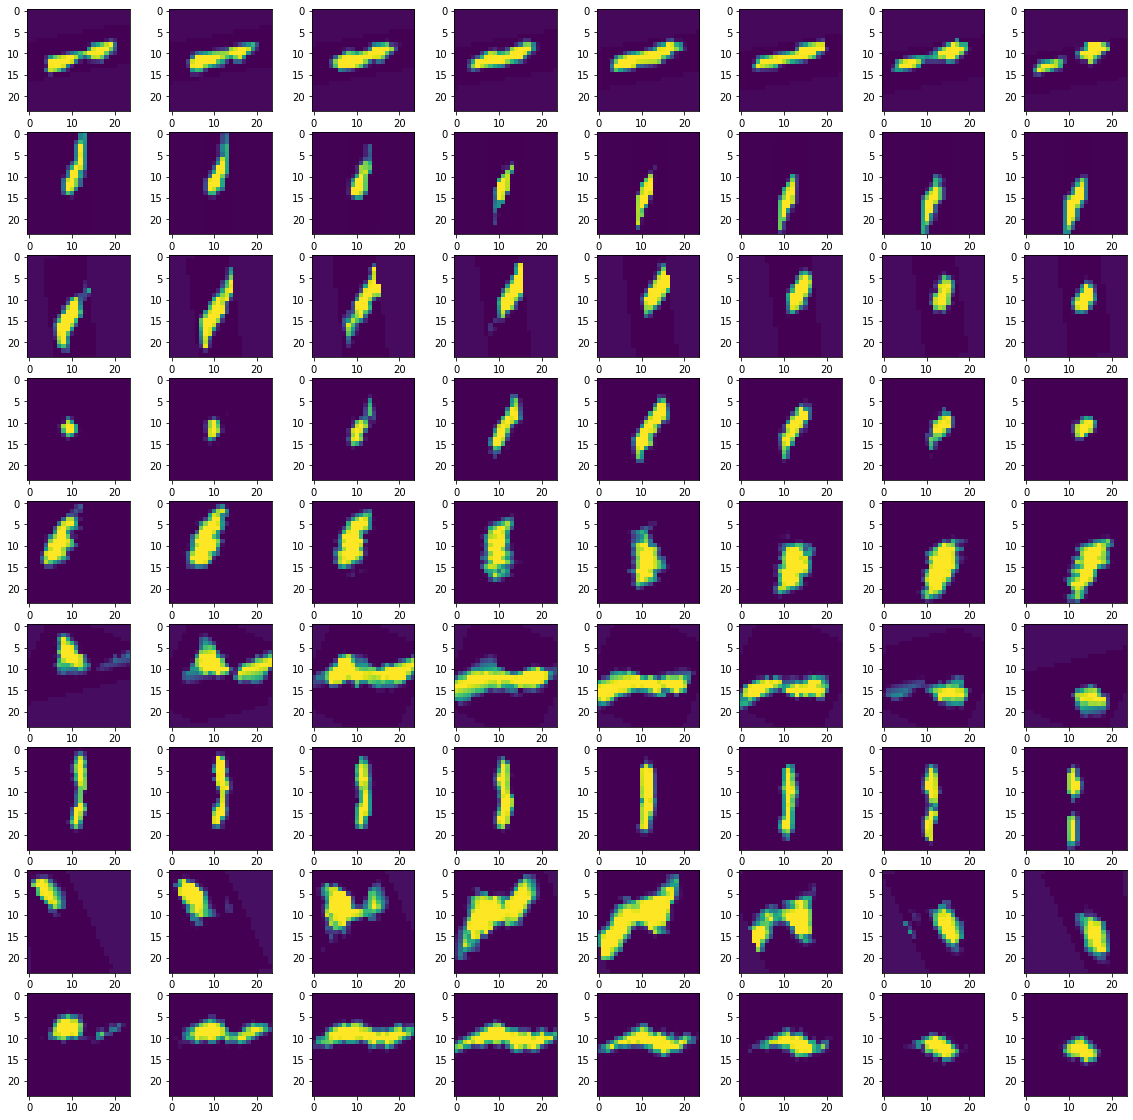

In [129]:
import matplotlib.pyplot as plt
img=data['mask']['data'].numpy()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(9,8, figsize=(20,20)) 

for i in range(9):
    for j in range(8):
        axarr[i,j].imshow(img[i,0,:,:,j])